# Лабораторная работа №4. Логические методы классификации

Выполнил: _Бересланов Рамазан_ 
Группа: ПИЖ-б-о-22-1

## Цель работы
Цель лабораторной работы: изучение принципов построения
информационных систем с использованием логических методов
классификации.

## Методика выполнения работы

Выполните построение модели классификации на основе дерева
классификации. В ходе решения задачи необходимо решить следующие
подзадачи:
 - Построение логического классификатора с заданием max_depth
(максимальной глубины) и max_features (максимального количества
признаков) пользователем (установить любые); визуализация дерева решений
для выбранных исследователем параметров (в формате .png)

### Загрузка библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Загрузка набора данных
data_source = "rice.data"
df = pd.read_table(data_source, delimiter=',',
                   header=None,
                   names=['Area', 'Perimeter', 'Major_Axis_Length',
                          'Minor_Axis_Length', 'Eccentricity',
                          'Convex_Area', 'Extent', 'Class'])

# Выбор целевой переменной
dy = df['Class']

# Выбор признаков
dx = df.drop('Class', axis=1)

### Разделение данных на обучающую и тестовую выборки

In [3]:
x_train, x_test, y_train, y_test = train_test_split(dx, dy, test_size=0.25, random_state=42)

### Построение логического классификатора

#### Задание параметров

In [4]:
max_depth = 3  # Максимальная глубина дерева
max_features = 2  # Максимальное количество признаков

# Создание классификатора
clf = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features)

# Обучение модели
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=2)

#### Визуализация дерева решений

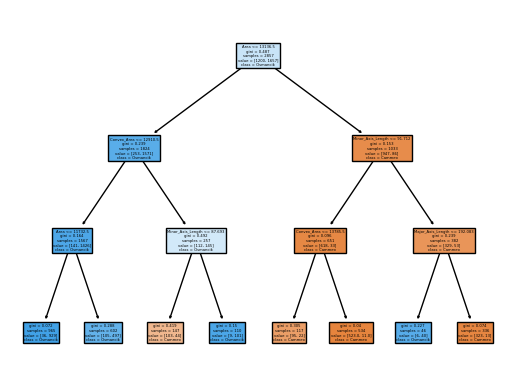

In [5]:
# Сохранение изображения дерева
plot_tree(clf, filled=True, feature_names=dx.columns, class_names=dy.unique())
plt.show()

 - Вычисление оценки cross validation (MSE) для различнх значений
max_depth (построить график зависимости);

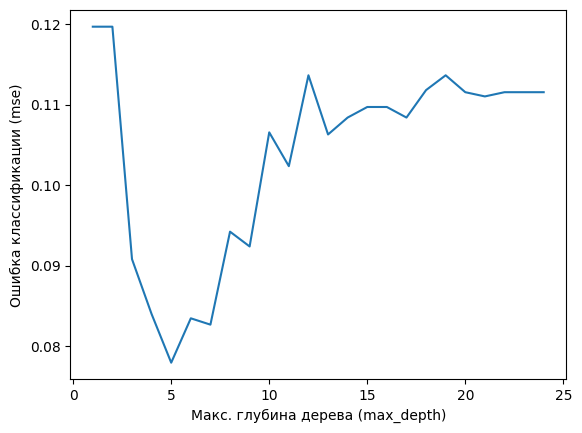

In [6]:
from sklearn.model_selection import cross_val_score

depth_range = list(range(1, 25))
mse_scores_depth = []

for depth in depth_range:
  clf = DecisionTreeClassifier(max_depth=depth,
                               random_state=21,
                               max_features=max_features)
  scores = cross_val_score(clf, dx, dy, cv=10, scoring='accuracy')
  mse_scores_depth.append(np.mean(scores))

mse = [1-x for x in mse_scores_depth]

plt.plot(depth_range, mse)
plt.xlabel('Макс. глубина дерева (max_depth)')
plt.ylabel('Ошибка классификации (mse)')
plt.show()

In [7]:
max_depth = 5

 - Вычисление оценки cross validation (MSE) для различнх значений
max_features (построить график зависимости);

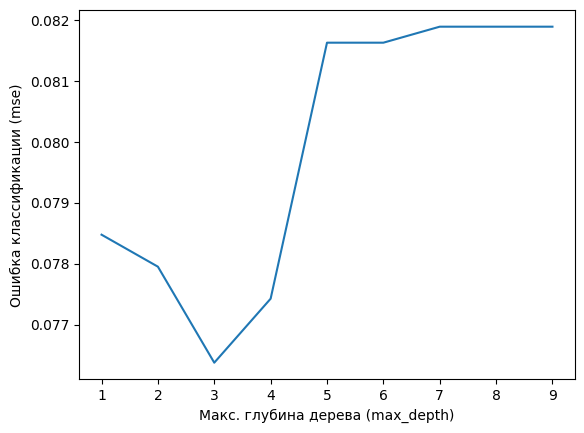

In [8]:
from sklearn.model_selection import cross_val_score

features_range = list(range(1, 10))
mse_scores_features = []

for features in features_range:
  clf = DecisionTreeClassifier(max_depth=max_depth,
                               random_state=21,
                               max_features=features)
  scores = cross_val_score(clf, dx, dy, cv=10, scoring='accuracy')
  mse_scores_features.append(np.mean(scores))

mse = [1-x for x in mse_scores_features]

plt.plot(features_range, mse)
plt.xlabel('Макс. глубина дерева (max_depth)')
plt.ylabel('Ошибка классификации (mse)')
plt.show()

In [9]:
max_features = 3

 - Вычислите оптимальные значения max_depth и max_features.
Обоснуйте свой выбор. Продемонстрируйте использование полученного
классификатора.

In [10]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import tree

dtc = DecisionTreeClassifier(max_depth=10, random_state=21, max_features=7)

tree_params = {'max_depth': range(1, 20), 'max_features': range(1, 4)}
tree_grid = GridSearchCV(dtc, tree_params, cv=10, verbose=True, n_jobs=-1)
tree_grid.fit(dx, dy)

print('\n')
print('Лучшее сочетание параметров: ', tree_grid.best_params_)
print('Лучшие баллы cross validation: ', tree_grid.best_score_)

tree.export_graphviz(tree_grid.best_estimator_,
                     feature_names=dx.columns,
                     class_names=dy.unique(),
                     out_file='rice_tree.dot',
                     filled=True, rounded=True)

Fitting 10 folds for each of 57 candidates, totalling 570 fits


Лучшее сочетание параметров:  {'max_depth': 5, 'max_features': 3}
Лучшие баллы cross validation:  0.9236220472440945


 - Выведите дерево в формате .png;

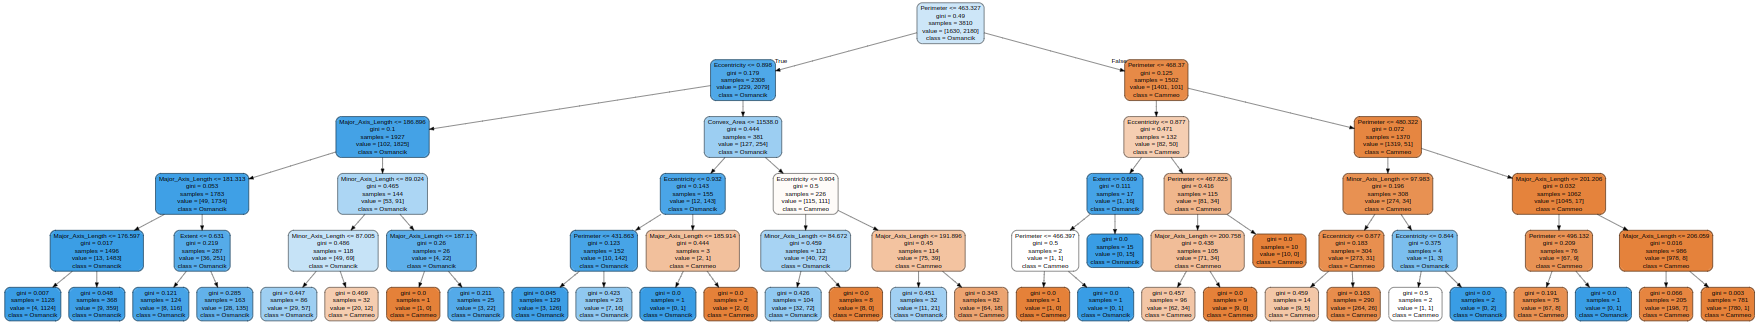

 - Выведите решающие границы полученной модели

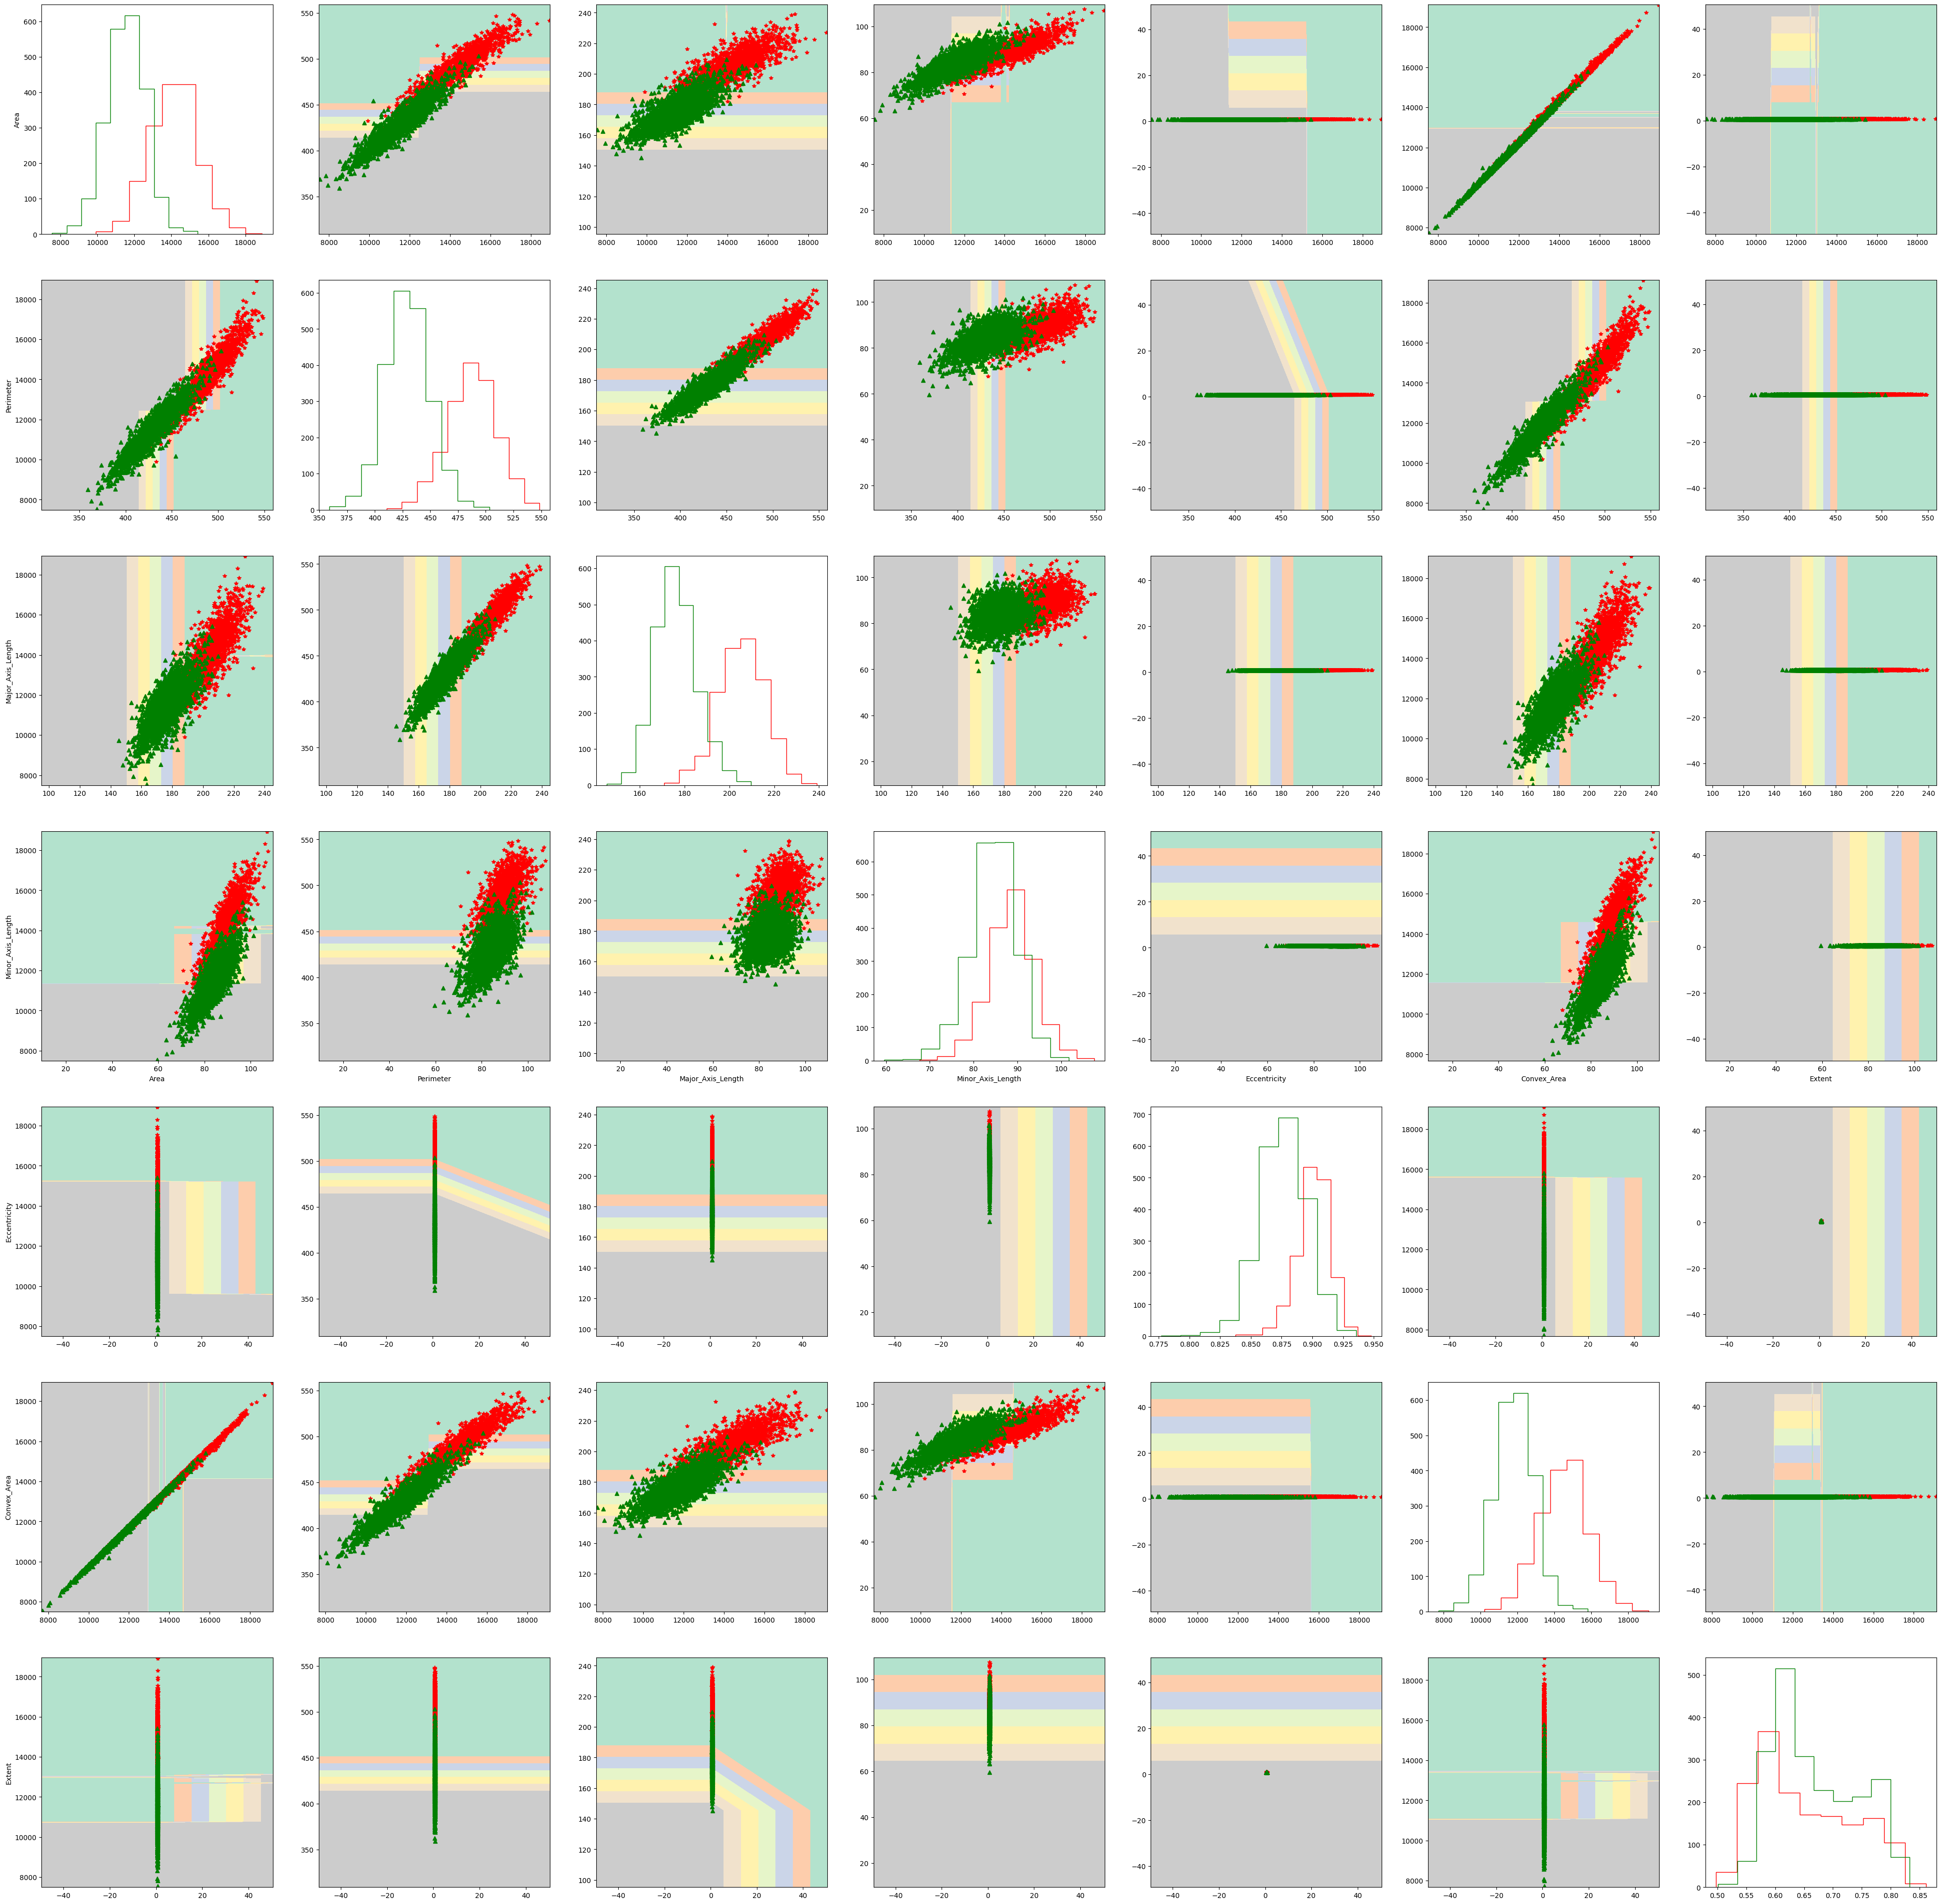

In [15]:
plot_markers = ['r*', 'g^']
answers = dy.unique()
labels = dx.columns.values

# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(7, 7, figsize=(49,49))

fmin = dx.min().values-50
fmax = dx.max().values+50
plot_step = 50

# Обходим все subplot
for i in range(0,7):
    for j in range(0,7):

        # Строим решающие границы
        if(i != j):
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step, dtype=float),
                               np.arange(fmin[j], fmax[j], plot_step, dtype=float))
            model = DecisionTreeClassifier(max_depth=5, random_state=21, max_features=3)
            model.fit(dx.iloc[:, [i,j]].values, dy.values)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)
            p[p==answers[0]] = 0
            p[p==answers[1]] = 1
            p=p.astype('int32')
            places[i,j].contourf(xx, yy, p, cmap=plt.cm.Pastel2)

        # Обход всех классов (Вывод обучающей выборки)
        for id_answer in range(len(answers)):
            idx = np.where(dy == answers[id_answer])
            if i==j:
                places[i, j].hist(dx.iloc[idx].iloc[:,i],
                                  color=plot_markers[id_answer][0],
                                 histtype = 'step')
            else:
                places[i, j].plot(dx.iloc[idx].iloc[:,i], dx.iloc[idx].iloc[:,j],
                                  plot_markers[id_answer],
                                  label=answers[id_answer], markersize=6)

        # Печать названия осей
        if j==0:
          places[i, j].set_ylabel(labels[i])

        if i==3:
          places[i, j].set_xlabel(labels[j])

## Контрольные вопросы

## Ответы на контрольные вопросы:

**1. Поясните принцип построения дерева решений.**

**Дерево решений** - это алгоритм машинного обучения, который используется для классификации или регрессии.

**Процесс построения:**

1. **Выбор признака:**
   Выбирается признак, который наиболее информативно разделяет объекты на разные классы.
2. **Разбиение:**
   Данные разбиваются на подмножества по значениям выбранного признака.
3. **Повторение:**
   Процесс разделения повторяется для каждого подмножества, пока не будут достигнуты заданные критерии остановки (например, минимальная глубина дерева, минимальная чистота узлов).
4. **Листья:**
   Листья дерева - это конечные узлы, которые содержат предсказание класса или значения для каждого объекта.

**2. Укажите статистическое определение информативности.**

**Информативность признака** - это мера того, насколько он помогает разделить объекты на разные классы.

**Статистическое определение:**

Информативность признака $A$ относительно целевой переменной $Y$ определяется на основе статистики, например, χ² -теста:

```
I(A; Y) = χ² (A, Y) / (n - 1)
```

где:

* $χ² (A, Y)$ - χ² -статистика
* $n$ - количество объектов

**3. Поясните энтропийное определение информативности.**

**Энтропия** - это мера неопределенности распределения вероятностей.

**Энтропийное определение:**

Информативность признака $A$ относительно целевой переменной $Y$ определяется как:

```
I(A; Y) = H(Y) - H(Y | A)
```

где:

* $H(Y)$ - энтропия распределения вероятностей $Y$
* $H(Y | A)$ - условная энтропия распределения вероятностей $Y$ при фиксированном значении $A$

**4. Что такое многоклассовая информативность? Для чего она применяется?**

**Многоклассовая информативность** - это мера того, насколько признак помогает разделить объекты на **множество** классов.

**Применение:**

* Выбор оптимального признака для разбиения данных на подмножества в задачах с множеством классов.
* Оценка качества модели машинного обучения.

**5. Поясните назначение и алгоритм бинаризации количественных признаков.**

**Количественные признаки** - это признаки, которые могут принимать любое значение в некотором интервале.

**Бинаризация** - это преобразование количественного признака в бинарный (принимающий два значения).

**Алгоритмы бинаризации:**

* **Метод порогового значения:**
  * Выбирается порог, который разделяет объекты на два класса.
* **Метод равных интервалов:**
  * Диапазон значений признака разбивается на равные интервалы.
* **Метод квантилей:**
  * Данные разбиваются на фиксированное количество интервалов (например, квартили).

**6. Поясните порядок поиска закономерностей в форме конъюнкций.**

**Конъюнкция** - это логическое выражение, которое соединяет несколько логических выражений с помощью оператора "И".

**Алгоритмы поиска закономерностей:**

* **Алгоритм Apriori:**
  * Поиск закономерностей путем последовательного увеличения длины конъюнкций.
* **Алгоритм FP-Growth:**
  * Поиск закономерностей путем построения дерева префиксных проекций.

